# ML Web App Using Flask Explore

# 1. Preparar el entorno. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carga de Datos. 

In [3]:
df = pd.read_csv('../data/raw/data_starts.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


Notas:  
- No hay valores nulos. 
- Hay dos variables de tipo object "Star color" y "Spectral Class". 

In [5]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


# 3. EDA inicial. 

### Análisis univariado. 

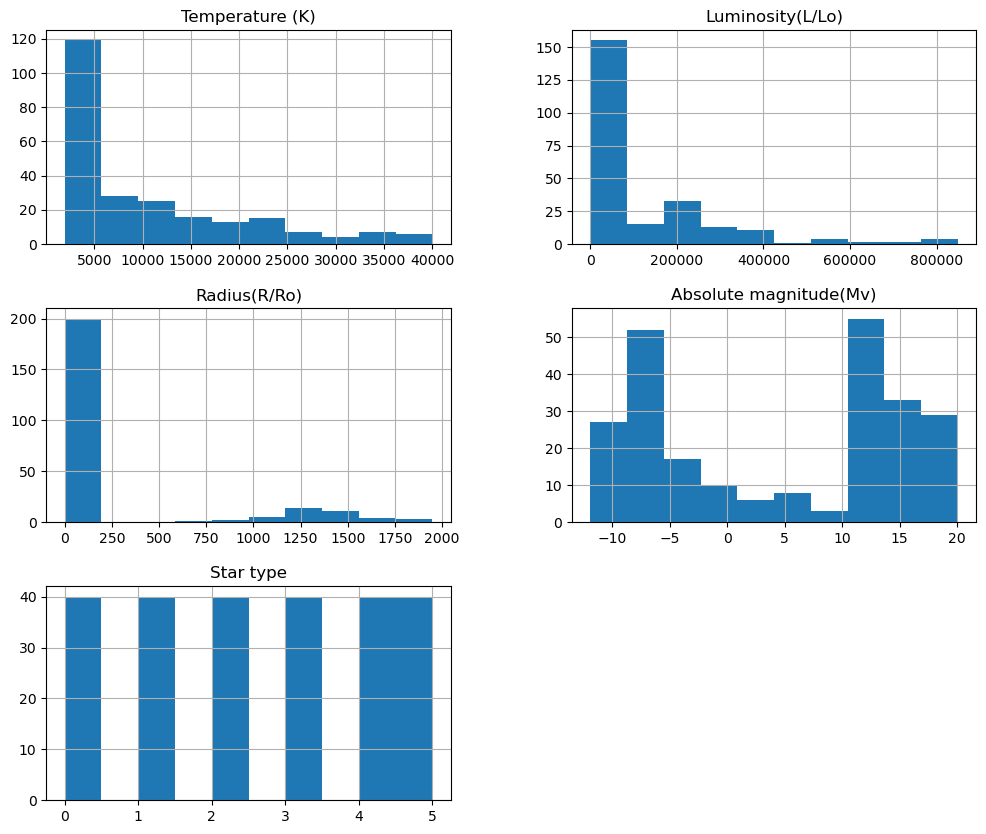

In [6]:
df.hist(figsize=(12,10))
plt.show()

### Análisis Bivariado. 

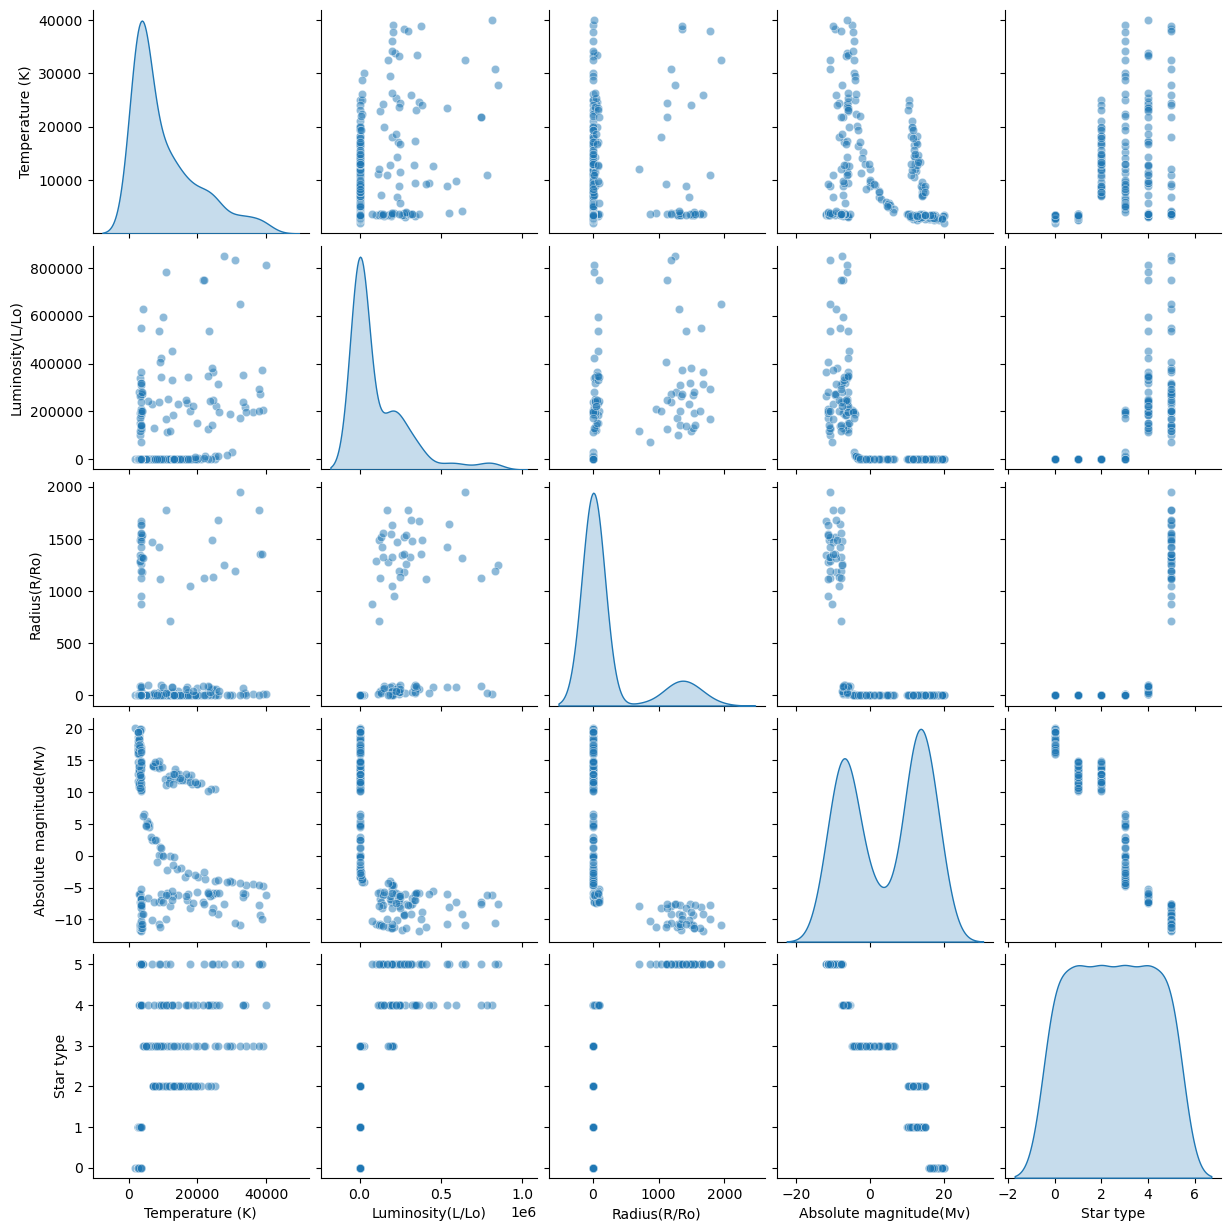

In [7]:
sns.pairplot(df, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})

### Correlación. 

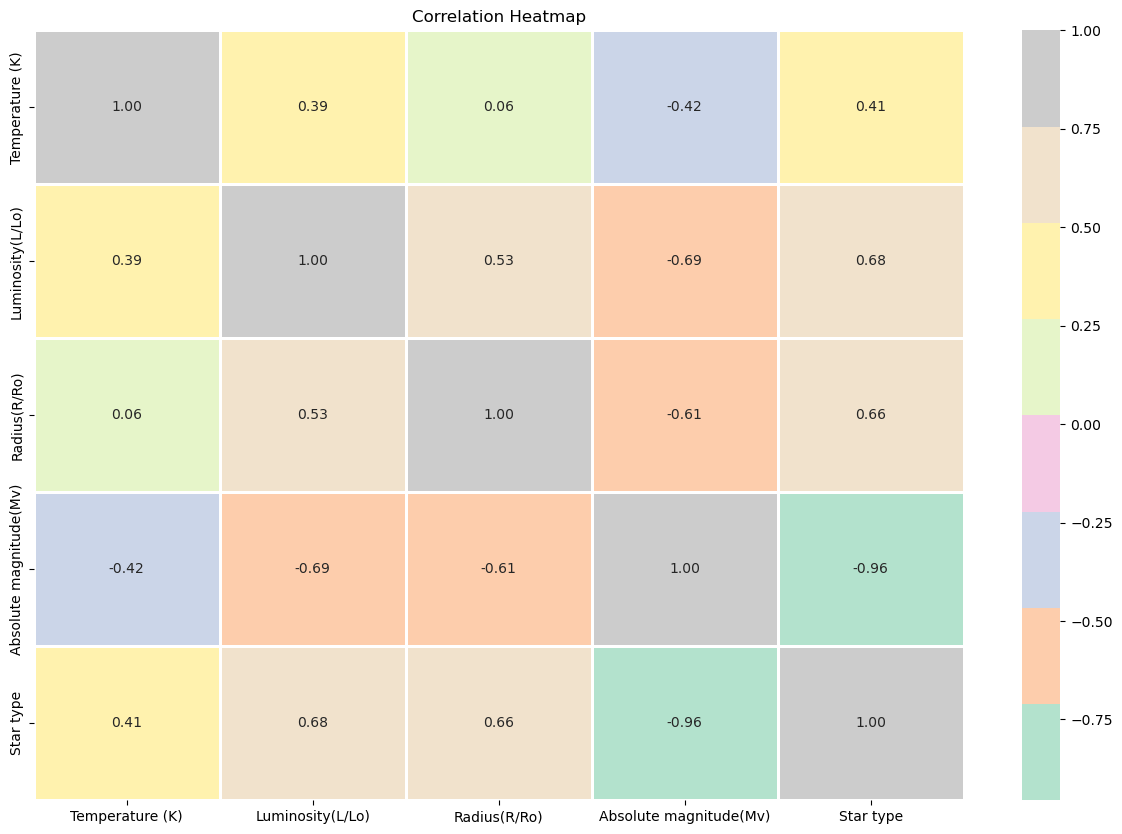

In [9]:
plt.figure(figsize=(15, 10))
df_numeric = df.drop(columns=['Star color', 'Spectral Class'])
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

# 3. Limpieza de Datos (Data Cleansing). 

### Tratamiento de outliers. 

In [10]:
def outliers_column(df):
    columnas_con_outliers = []
    
    # Iterar sobre cada columna del DataFrame
    for col in df.columns:
        # Asegurarse de que la columna es numérica
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            
            # Definir los límites para los outliers
            limite_inferior = q1 - 1.5 * iqr
            limite_superior = q3 + 1.5 * iqr
            
            # Verificar si hay algún valor atípico en la columna
            outliers_presentes = ((df[col] < limite_inferior) | (df[col] > limite_superior)).any()
            
            # Si se encuentran outliers, agregar el nombre de la columna a la lista
            if outliers_presentes:
                columnas_con_outliers.append(col)
    
    return columnas_con_outliers

In [12]:
out_data = outliers_column(df)

In [13]:
def plot_outliers_boxplots(df, columns):
    # 1. Contar el número de columnas con outliers
    num_cols = len(columns)

    # 2. Definir la disposición de los subplots (ej. 2 filas, 2 columnas)
    # Esto es flexible, puedes ajustarlo según tus necesidades
    num_filas = 4
    num_columnas = int(np.ceil(num_cols / num_filas))

    # 3. Crear la figura y los subplots
    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 10))

    # Aplanar el array de ejes para iterar fácilmente
    axes = axes.flatten()

    # 4. Iterar sobre las columnas y dibujar el box plot en cada subplot
    for i, col in enumerate(columns):
        ax = axes[i]
        ax.boxplot(df[col], vert=False) # vert=False para que sean horizontales
        ax.set_title(f'{col}')
        ax.set_xlabel('Valores')
        ax.grid(True, linestyle='--', alpha=0.6)

    # Ocultar los subplots que no se usen (si los hay)
    for i in range(num_cols, len(axes)):
        axes[i].axis('off')

    # Ajustar el espaciado entre subplots
    plt.tight_layout()
    plt.show()

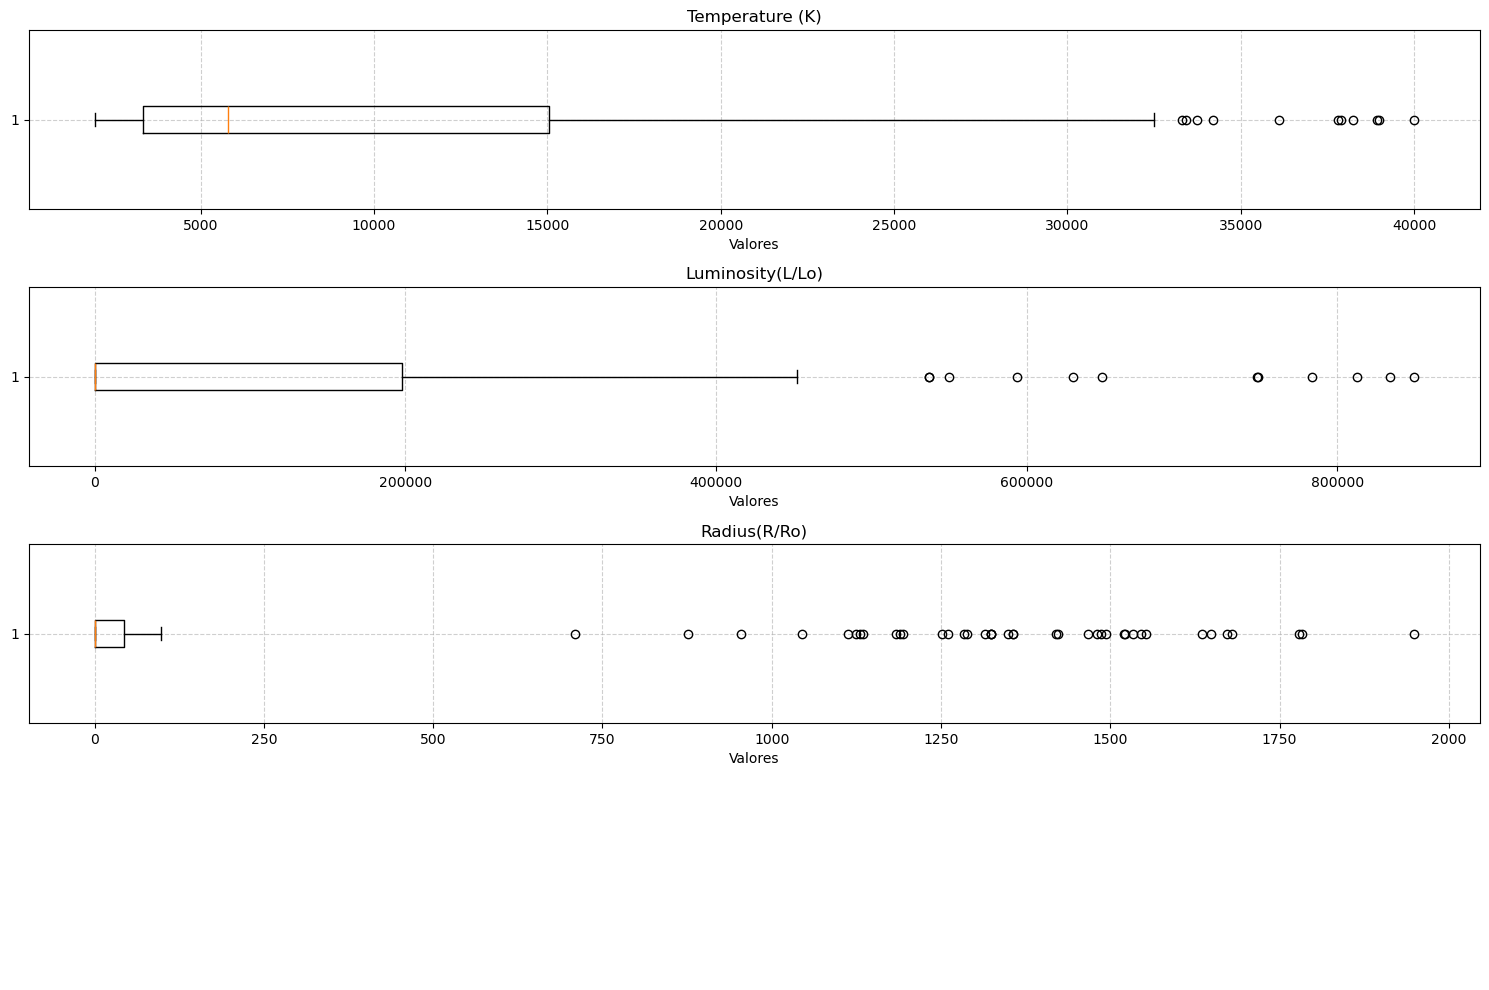

In [14]:
plot_outliers_boxplots(df, out_data)

Notas:  
- Como puede observarse tres features tienen valores outliers: Temperature, Luminosity y Radius.
- A simple vista se trata de pocos valores atípicos en cada una de las mediciones. 

# 4. Ingeniería de Características (Feature Engineering). 

# 5. EDA refinado. 

# 6. Modelo Predictivo. 

# 7. Guardar modelo. 